# Capstone 3 Modeling

In [1]:
import os
import re
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
plant1_avg = pd.read_csv('../data/plant1_avg.csv')
plant2_avg = pd.read_csv('../data/plant2_avg.csv')

## Plant 1

In [3]:
p1_new_weather = pd.read_csv('../data/p1_new_weather1.csv')

In [4]:
p1_new_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 169 non-null    object 
 1   temperature              169 non-null    float64
 2   skin_temperature         169 non-null    float64
 3   surface_solar_radiation  169 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.4+ KB


In [5]:
p1_new_weather.rename(columns={'datetime':'date_time','temperature':'ambient_temperature',
                               'skin_temperature':'skin_temperature','surface_solar_radiation':'irradiation'},inplace=True)

In [6]:
p1_new_weather.head()

,date_time,ambient_temperature,skin_temperature,irradiation
0,6/18/20 0:00,28.87,27.17,0.0
1,6/18/20 1:00,28.04,26.81,0.0
2,6/18/20 2:00,27.82,26.60,0.0
3,6/18/20 3:00,28.05,26.10,0.0
4,6/18/20 4:00,28.01,25.98,0.0


In [7]:
p1_new_weather.describe()

,ambient_temperature,skin_temperature,irradiation
count,169.000000,169.000000,169.000000
mean,31.245207,32.574852,0.211596
std,3.192802,5.909223,0.274237
min,26.490000,24.750000,0.000000
25%,28.440000,27.810000,0.000000
50%,30.270000,30.580000,0.018380
75%,33.930000,36.500000,0.402360
max,37.570000,46.300000,0.930530


In [8]:
plant1_avg[['dc_power','ambient_temperature','module_temperature','irradiation']].describe()

,dc_power,ambient_temperature,module_temperature,irradiation
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,311.710849,25.560257,31.175453,0.230103
std,400.216841,3.351059,12.272685,0.301348
min,0.000000,20.398505,18.140415,0.000000
25%,0.000000,22.739895,21.130249,0.000000
50%,38.316610,24.680324,24.801971,0.027748
75%,638.185733,27.941221,41.449481,0.451576
max,1358.720714,35.252486,65.545714,1.221652


### Predicting Module Temperature

In [9]:
X1 = plant1_avg[['ambient_temperature','irradiation']]
y1 = plant1_avg[['module_temperature']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train1, y_train1)

y_pred1 = lm.predict(X_test1)

print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9758965595247767
[[ 1.20593178 29.4093822 ]]


In [10]:
X_new1a = p1_new_weather[['ambient_temperature','irradiation']]

y_pred_module1 = lm.predict(X_new1a)

p1_new_weather['module_temperature'] = y_pred_module1
p1_new_weather

,date_time,ambient_temperature,skin_temperature,irradiation,module_temperature
0,6/18/20 0:00,28.87,27.17,0.0,28.374765
1,6/18/20 1:00,28.04,26.81,0.0,27.373841
2,6/18/20 2:00,27.82,26.60,0.0,27.108536
3,6/18/20 3:00,28.05,26.10,0.0,27.385901
4,6/18/20 4:00,28.01,25.98,0.0,27.337663
...,...,...,...,...,...
164,6/24/20 20:00,31.16,30.62,0.0,31.136348
165,6/24/20 21:00,29.39,29.43,0.0,29.001849
166,6/24/20 22:00,27.75,29.13,0.0,27.024121
167,6/24/20 23:00,27.57,28.59,0.0,26.807053


### Predicting DC Power

In [11]:
X1 = plant1_avg[['ambient_temperature','module_temperature','irradiation']]
y1 = plant1_avg[['dc_power']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train1, y_train1)

y_pred1 = lm.predict(X_test1)

print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9903677405115726
[[1.68117721e-01 1.06200039e+00 1.28102772e+03]]


In [12]:
X_new1b = p1_new_weather[['ambient_temperature','module_temperature','irradiation']]

y_pred_dc1 = lm.predict(X_new1b)

p1_new_weather['dc_power'] = y_pred_dc1
p1_new_weather

,date_time,ambient_temperature,skin_temperature,irradiation,module_temperature,dc_power
0,6/18/20 0:00,28.87,27.17,0.0,28.374765,14.528372
1,6/18/20 1:00,28.04,26.81,0.0,27.373841,13.325853
2,6/18/20 2:00,27.82,26.60,0.0,27.108536,13.007113
3,6/18/20 3:00,28.05,26.10,0.0,27.385901,13.340341
4,6/18/20 4:00,28.01,25.98,0.0,27.337663,13.282388
...,...,...,...,...,...,...
164,6/24/20 20:00,31.16,30.62,0.0,31.136348,17.846164
165,6/24/20 21:00,29.39,29.43,0.0,29.001849,15.281757
166,6/24/20 22:00,27.75,29.13,0.0,27.024121,12.905696
167,6/24/20 23:00,27.57,28.59,0.0,26.807053,12.644908


### Import Saved Model

In [13]:
import pickle 

gb_filename = 'gb_model_plant1.sav'
gb_model_plant1 = pickle.load(open(gb_filename, 'rb'))

In [14]:
X_new11 = p1_new_weather[['dc_power','ambient_temperature','module_temperature','irradiation']]

delta_daily_yield_pred = gb_model_plant1.predict(X_new11)
delta_daily_yield_pred

array([  9.33595759,   6.24024742,   6.54312447,   6.24024742,
         6.24024742,   7.35781518,  10.07524802,  40.1008004 ,
        73.68564442,  75.55984316, 104.55191859, 131.07244119,
       139.79798189, 151.12030911, 150.70089515, 148.61009962,
       148.03732747, 108.62570636,  64.84583088,   9.94091593,
         9.07637196,   9.54771208,  10.09739065,   8.24569766,
         8.24569766,   9.33595759,   7.35781518,   5.98253213,
         5.98253213,   7.35781518,   9.29294733,  50.81720938,
       101.75078823, 133.95236197, 131.01460988, 148.96905803,
       182.92083902, 222.63412084, 244.73677015, 197.38442941,
       172.90029271, 111.84588504,  64.84583088,   9.94091593,
         9.07637196,   9.07637196,   8.24569766,   8.24569766,
         8.24569766,   8.94810829,   7.35781518,   5.98253213,
         5.98253213,   7.0031983 ,  10.05589821,  57.29811842,
       129.44885067, 159.66844322, 170.91407155, 159.10355097,
       257.59816136, 271.93505713, 279.36718447, 233.64

In [15]:
p1_new_weather['delta_daily_yield2'] = delta_daily_yield_pred

In [16]:
plant1_avg.date_time = pd.to_datetime(plant1_avg.date_time)
time1_hour = plant1_avg.set_index('date_time').resample('1H').mean()
time1_hour.reset_index(inplace=True)

/var/folders/4l/b80w301n0_388w30snyzlx500000gn/T/ipykernel_33671/4271835550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time1a.date_time = pd.to_datetime(time1a.date_time)
/var/folders/4l/b80w301n0_388w30snyzlx500000gn/T/ipykernel_33671/4271835550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time1b.date_time = pd.to_datetime(time1b.date_time)


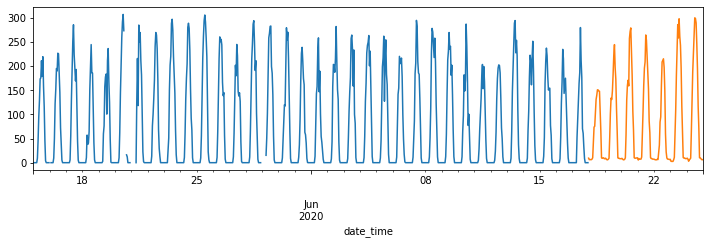

In [19]:
time1a = time1_hour[['date_time','delta_daily_yield2']]
time1b = p1_new_weather[['date_time','delta_daily_yield2']]

time1a.date_time = pd.to_datetime(time1a.date_time)
time1b.date_time = pd.to_datetime(time1b.date_time)

time1a.set_index('date_time',inplace=True)
time1b.set_index('date_time',inplace=True)

plt.figure(figsize=(12,3))
time1a.delta_daily_yield2.plot()
time1b.delta_daily_yield2.plot();

In [21]:
# time1_merged = pd.concat([time1a,time1b])
# time1_merged.date_time = pd.to_datetime(time1_merged.date_time)
# time1_merged.set_index('date_time',inplace=True)
# time1_merged

# plt.figure(figsize=(12,3))
# time1_merged.delta_daily_yield2[:815].plot()
# time1_merged.delta_daily_yield2[815:].plot();